# Reinforcement Learning in Cart Pole game

**The main objective of this project is to write an algorithm that would reach a score over 195 points per 1000 tries in Cart Pole game.**

## Cart Pole
*A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The system is controlled by applying a force of +1 or -1 to the cart. The pendulum starts upright, and the goal is to prevent it from falling over. A reward of +1 is provided for every timestep that the pole remains upright. The episode ends when the pole is more than 15 degrees from vertical, or the cart moves more than 2.4 units from the center.* 

source: https://gym.openai.com/envs/CartPole-v1/

<video controls src="data/Cart_Pole.mp4" width = 300 height = 200 loop = TRUE/>

The idea for solving the problem (the physical part) was taken from: https://towardsdatascience.com/how-to-beat-the-cartpole-game-in-5-lines-5ab4e738c93f </br>Following the words from the article *"So the next time we apply any machine learning algorithm, it’s always better to check for existing knowledge first."*, to solve the task, I used basic laws of physics. An algorithm that always wins was obtained. The points are shown in the graph.

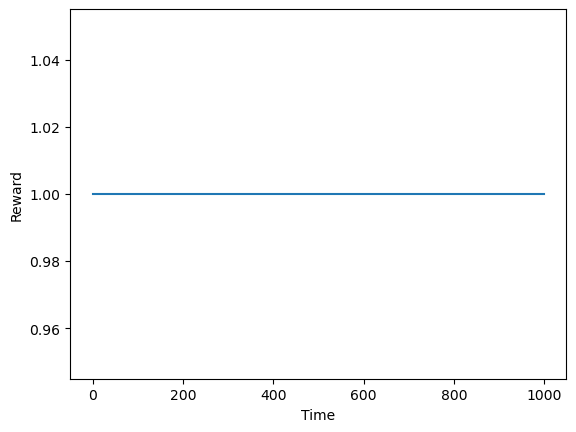


1000.0


PyObject Text(24.000000000000007, 0.5, 'Reward')

In [8]:
using ReinforcementLearningBase, ReinforcementLearningEnvironments
using Flux, GR, PyPlot
import StatsBase.sample, StatsBase.Weights

env = CartPoleEnv(;max_steps = 1000);
obs = RLBase.reset!(env)

env_state = env.state

function physics(env_state)
    angle = env.state[3]
    angle_velocity = env.state[4]
    if abs(angle) < 0.03
        angle_velocity < 0.0 ? (return 1.0) : (return 2.0)
    else
        angle < 0.0 ? (return 1.0) : (return 2.0)                
    end
end

function human_learning!(episodes::Int)
    ep = 1.0
    sum_rewards = 0.0
    rewards = []
    reward = []
    while ep ≤ episodes
        obs
        action = physics(env.state)
        env(action)
        z = deepcopy(RLBase.reward(env))
        sum_rewards += z
        push!(reward, z)
        ep += 1.0
    end
    return sum_rewards, reward
end

sum_rewards, reward = human_learning!(1000);
println("\n",sum_rewards)

PyPlot.plot(reward)
PyPlot.xlabel("Time")
PyPlot.ylabel("Reward")